In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# there were 76 columns but it stated to use th 14 columns only.
# Hence using those 14 only.
# we have to predict the target

In [7]:
# categorical variables ->  cp restecg slope thal 

In [8]:
data = pd.get_dummies(data,columns=['cp','thal','slope'])
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [9]:
# removing any nan values 
# data = data.dropna()
# data = data.drop(columns=['cp','restecg','thal','slope'])

In [10]:
data.head()
# data['target'].unique()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
# There is not much about the data to infer of and thus I would be using the models directly and fitting them.

In [12]:
# importing the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [13]:
# TRAIN TEST SPLIT
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
y_test = y_test.to_list()


## Logistic Regression

Key Points 
Works for binary classfication
```
Penalty
```
L1(Lasso) and L2(Ridge) regularization are not model enhancing things. Instead they are made to introduce to model to make it impure so as the model can be genralized well to the real case scenarios ..

As Lasso has the square term of the weights hence the Features that are less important in magnitude are shrinked to zero. Thus removing them all together.

This is not in case of Ridge regression which uses the absolute of the weight as the addtion to the loss function and hence all the features are kept but the addition if huge compared to the Lasso .

```
Solver
```

The purpose of solver is to reach the minimum of the function . 
Most times we are using the newton-cg method to reacht the minimum of the function.

for smaller datasets the liblinear is good but for larger datasets the sag is good

```
tol - 0.0001(defualt)
```
determines when to stop.

```
max_iter.
```
Max number of iterations to converge. 

In [15]:
C = [0.0001,0.001,0.01,1,10]
# C is the inverse of regularization and this effects the extent of regularization in it. Less the C more the regularization..

for c in C:
    lr = LogisticRegression(penalty='l2',C=c,solver='newton-cg',tol=0.0001,max_iter=100)
    lr.fit(X_train,y_train)
    y_predict = lr.predict(X_test)
    count = 0
    for i in range(len(y_test)):
        if y_test[i] == y_predict[i]:
            count += 1
    print("C is:",c,"For Logistic regression acccuracy is :",count/len(y_test))


C is: 0.0001 For Logistic regression acccuracy is : 0.7540983606557377
C is: 0.001 For Logistic regression acccuracy is : 0.7377049180327869
C is: 0.01 For Logistic regression acccuracy is : 0.8032786885245902
C is: 1 For Logistic regression acccuracy is : 0.9836065573770492
C is: 10 For Logistic regression acccuracy is : 1.0


## KNN

There are not parameters to tweak to.

In [16]:
list = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    count = 0
    for i in range(len(y_test)):
        if y_test[i] == y_predict[i]:
            count += 1
    list.append(count/len(y_test))
print("The best knn accuracy acheived is : ",max(list))  

The best knn accuracy acheived is :  0.819672131147541


## Naive Bayes

In [17]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict = gnb.predict(X_test)
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_predict[i]:
        count += 1
print("The accuracy of the Naive Bayes is : ",count/len(y_test)) 

The accuracy of the Naive Bayes is :  1.0


 As you can see that the naive bayes gives us about 100 % accuracy . This is because of the following reasons =>

It is a fast learner and hence requires less data to learn.


1) Presence of many independent variables.

2) High correlation between the independent variables. There must be fields that are not much interrelated to each other. 



## SVM

```
C (regularization parameter)
```
The strength of regularization is inversely proportional to the C
```
kernel 
```
it is of many types . including the rbf , poly, linear, etc..

In [18]:
svm = SVC(kernel='rbf',gamma=0.002)
svm.fit(X_train,y_train)
y_predict = svm.predict(X_test)
print(y_predict)
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_predict[i]:
        count += 1
print("The accuracy of the SVM is : ",count/len(y_test)) 

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0]
The accuracy of the SVM is :  0.7868852459016393


## Decision Tree Classification


In [29]:
dtree = DecisionTreeClassifier(max_depth=1,criterion='gini')
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_predict[i]:
        count += 1
print("The accuracy of the Decision Tree classifier is : ",count/len(y_test)) 
print(dtree.get_depth())



The accuracy of the Decision Tree classifier is :  0.9344262295081968
1


In [30]:
## THey tend to overfit easily..

[Text(167.4, 163.07999999999998, 'X[20] <= 0.5\ngini = 0.499\nsamples = 242\nvalue = [126, 116]'),
 Text(83.7, 54.360000000000014, 'gini = 0.223\nsamples = 133\nvalue = [17, 116]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]')]

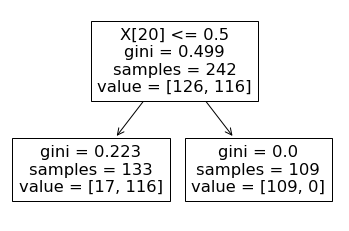

In [28]:
from sklearn import tree
tree.plot_tree(dtree)